In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
# Crear dataset
data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# Obesrvar el dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Modificar la variable Gender
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [5]:
# Observar la modificación
display(data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [6]:
# Selección de las variables a utilizar
new = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]
new.head()

,Annual Income (k$),Spending Score (1-100),Gender
0,15,39,0
1,15,81,0
2,16,6,1
3,16,77,1
4,17,40,1


In [7]:
# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(new)

# Creación del linkage
linkage_matrix = linkage(new, method='ward')

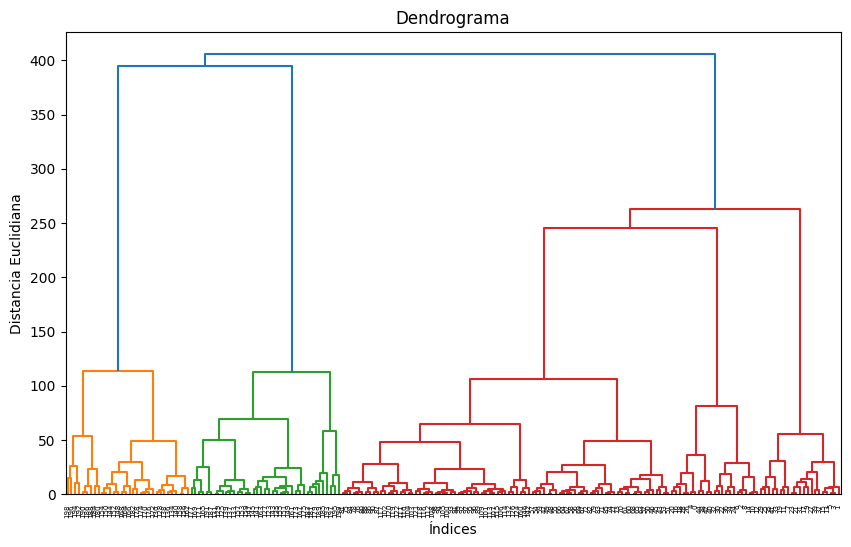

In [8]:
# Grafica dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, orientation= 'top', labels = new.index, distance_sort= 'descending', show_leaf_counts= True)
plt.title('Dendrograma')
plt.xlabel('Índices')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [9]:
# Entrenar el modelo y definir los cluster
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
n_clusters = 5  # Número de clústeres
new_clusstering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = new_clusstering.fit_predict(df_scaled)

# Ajuste del modelo
cluster_labels = new_clusstering.fit_predict(df_scaled)

# Añadir los clústeres al dataset
new['Cluster'] = clusters

# Mostrar los datos con los clústeres asignados
print("Datos con Clústeres Asignados:")
print(new.head())

# Describir cada clúster
summary = new.groupby('Cluster').mean()
print("\nResumen de las Variables por Clúster:")
print(summary)

Datos con Clústeres Asignados:
   Annual Income (k$)  Spending Score (1-100)  Gender  Cluster
0                  15                      39       0        4
1                  15                      81       0        3
2                  16                       6       1        4
3                  16                      77       1        1
4                  17                      40       1        4

Resumen de las Variables por Clúster:
         Annual Income (k$)  Spending Score (1-100)    Gender
Cluster                                                      
0                 86.538462               82.128205  0.538462
1                 49.841270               54.968254  1.000000
2                 89.406250               15.593750  0.437500
3                 49.318182               55.227273  0.000000
4                 25.727273               20.227273  0.636364


<ipython-input-9-e68f8ec42978>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Cluster'] = clusters


In [10]:
# Calcular el Coeficiente de Silhouette:
silhouette = silhouette_score(df_scaled, cluster_labels)
print(f"Coeficiente de Silhouette para {n_clusters} clusters: {silhouette:.2f}")

# Calcular el Calinski-Harabasz Index:
calinski_harabasz = calinski_harabasz_score(df_scaled, cluster_labels)
print(f"Índice Calinski-Harabasz para {n_clusters} clusters: {calinski_harabasz:.2f}")

Coeficiente de Silhouette para 5 clusters: 0.39
Índice Calinski-Harabasz para 5 clusters: 93.25


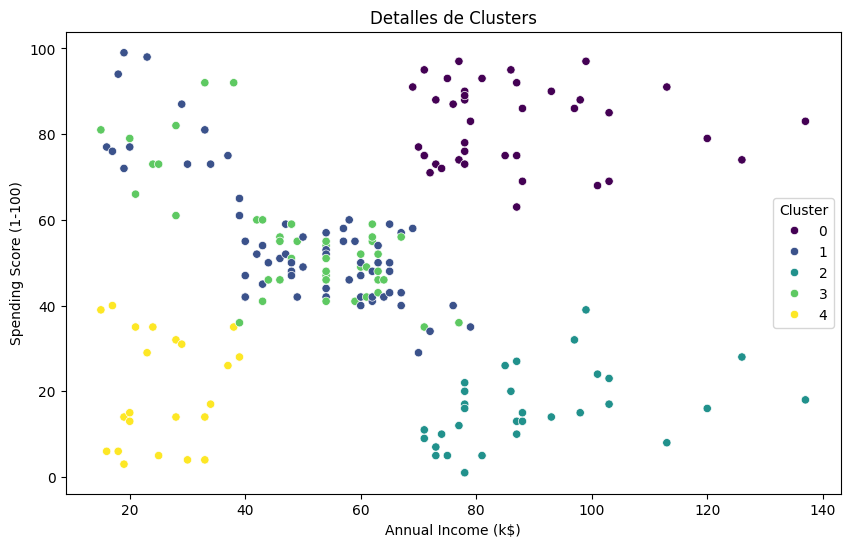

In [12]:
# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=new, palette='viridis')
plt.title('Detalles de Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()